In [1]:
# Paquetes

import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import (
        train_test_split,
        learning_curve,
        StratifiedKFold,
        cross_val_score
        )
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# from functions_model import plots_freq_target,prepare_datasets,prepare_datasets_sinseg,get_file,plot_ROC,plot_confusion_matrix
# from functions_model import plot_learning_curve,plot_ROC_kfolds

import json
#import lightgbm as lgb
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, mean_squared_error, roc_auc_score, precision_score 
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
#import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import s3fs
import pyarrow.parquet as pq

In [2]:
def read_parquet(ruta:str): 
    fs = s3fs.S3FileSystem()
    dataset = pq.ParquetDataset(ruta, filesystem=fs)
    table = dataset.read()
    df = table.to_pandas()
    return df

In [3]:
data_202008_piloto = read_parquet("s3://adl-refined-dev-popular/parquet/TC_adquisicion/total_tdc_M202111")

In [4]:
data_202008_piloto = data_202008_piloto.rename(columns = {'amortizacion_min_lb':'amortizacion_min_LB',
                                                         'cuota_max_lb_smlv':'cuota_max_LB_SMLV'})

In [5]:
data_202008_piloto.count()

id_numero_cliente                 326770
id_tp_cd_x                        326770
id_cliente                        326770
fecha_camp                        326770
data_camp                         326770
fecha_buro                        326770
fecha_activos                     326770
fecha_pasivo                      326770
fecha_lib                         326770
fecha_tx_pav                      326770
acep_oferta_prev                   50575
num_act_utl_meses                  50575
num_camp_ult_meses                 50575
num_meses_ult_actv                   659
num_meses_ult_camp                 50575
num_no_aceptado                    50575
no_nulos                           50575
tipo_id                           316092
numero_obligaciones_activasdif    316092
porcentaje_utilizacion            316092
quanto_mod                        316092
valor_cuotas_codeudores_smlv      316092
valor_utilizado_smlv              316092
amortizacion_min_LB               298888
cuota_max_LB_SML

In [6]:
# data_202008_piloto.id_cliente = data_202008_piloto.id_cliente.apply(str)
# data_202008_piloto.id_cliente = data_202008_piloto.id_cliente.apply(int)

In [7]:
print(data_202008_piloto.shape)

(326770, 48)


In [8]:
print(data_202008_piloto.id_cliente.dtypes)

int64


In [9]:
data_202008=data_202008_piloto.copy()
data_202008.shape

(326770, 48)

In [10]:
data_202008.head()

,id_numero_cliente,id_tp_cd_x,id_cliente,fecha_camp,data_camp,fecha_buro,fecha_activos,fecha_pasivo,fecha_lib,fecha_tx_pav,acep_oferta_prev,num_act_utl_meses,num_camp_ult_meses,num_meses_ult_actv,num_meses_ult_camp,num_no_aceptado,no_nulos,tipo_id,numero_obligaciones_activasdif,porcentaje_utilizacion,quanto_mod,valor_cuotas_codeudores_smlv,valor_utilizado_smlv,amortizacion_min_LB,cuota_max_LB_SMLV,num_lib_solicitadas,prom_monto_novado,prom_n_cuotas,id_tp_cd_y,pasv_antig_total,pasv_num_meses_ult_apertura,pasv_dias_desde_ultima_trans,pasv_saldo_total_1mes_atras,pasv_saldo_ca_1mes_atras,periodo,tipo_de_identificacion,num_tx_ult_1mes,num_tx_ult_2meses,num_tx_ult_6meses,sum_tx_linea_pasv,sum_tx_nolinea_pasv,fecha_ult_tx,dias_desde_ult_tx,num_tx_ult_1mes_ahr,num_tx_ult_4meses_ahr,sum_tx_linea_ahr,sum_tx_nolinea_ahr,dias_desde_ult_tx_ahr
0,13544804,1000003,102652295880533801,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,0.000000,2562000.0,0.589967,0.000000,0.335523,0.783668,1.0,16811819.0,99.0,1.0,164.700000,164.700000,8.0,0.246529,0.246529,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,6880226,1000003,102652295151150201,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.052632,0.545233,8630000.0,0.000000,17.765039,0.191228,1.804815,1.0,14438947.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,41311613,1000003,102652314595088801,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,0.940375,2607000.0,0.000000,8.280445,0.210738,0.270000,1.0,4916940.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,36695801,1000003,102652308842687701,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,0.000000,1844000.0,0.000000,0.000000,0.505416,0.370006,1.0,9593424.0,72.0,1.0,181.533333,181.533333,6.0,0.005942,0.005942,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,23173372,1000003,103552297266851902,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,0.000000,1489000.0,0.000000,0.000000,0.073087,0.109442,1.0,888697.0,49.0,1.0,240.533333,240.533333,7.0,0.008698,0.008698,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_202008.tail()

,id_numero_cliente,id_tp_cd_x,id_cliente,fecha_camp,data_camp,fecha_buro,fecha_activos,fecha_pasivo,fecha_lib,fecha_tx_pav,acep_oferta_prev,num_act_utl_meses,num_camp_ult_meses,num_meses_ult_actv,num_meses_ult_camp,num_no_aceptado,no_nulos,tipo_id,numero_obligaciones_activasdif,porcentaje_utilizacion,quanto_mod,valor_cuotas_codeudores_smlv,valor_utilizado_smlv,amortizacion_min_LB,cuota_max_LB_SMLV,num_lib_solicitadas,prom_monto_novado,prom_n_cuotas,id_tp_cd_y,pasv_antig_total,pasv_num_meses_ult_apertura,pasv_dias_desde_ultima_trans,pasv_saldo_total_1mes_atras,pasv_saldo_ca_1mes_atras,periodo,tipo_de_identificacion,num_tx_ult_1mes,num_tx_ult_2meses,num_tx_ult_6meses,sum_tx_linea_pasv,sum_tx_nolinea_pasv,fecha_ult_tx,dias_desde_ult_tx,num_tx_ult_1mes_ahr,num_tx_ult_4meses_ahr,sum_tx_linea_ahr,sum_tx_nolinea_ahr,dias_desde_ult_tx_ahr
326765,38225363,1000003,167163008185214713,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.111111,0.006316,8294000.0,0.0,0.330205,0.014148,1.389903,1.0,0.0,120.0,1.0,98.633333,98.633333,13.0,136.425559,136.425559,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
326766,11426435,1000003,211263578316689502,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000,0.000000,2743000.0,0.0,0.000000,0.000000,0.504965,1.0,0.0,72.0,1.0,3.433333,3.433333,14.0,0.000752,0.000752,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
326767,1094728009,1000003,171063576803460602,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.200000,0.000000,3070000.0,0.0,0.000000,0.194429,1.066132,1.0,45245914.0,99.0,1.0,165.933333,165.933333,12.0,0.003750,0.003750,2021-10-01,1,0.0,0.0,0.0,1.0,NaN,2021-10-26,5.0,0.0,0.0,1.0,NaN,5.0
326768,6256520,1000003,325563590406932202,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.153846,0.462683,3770000.0,0.0,6.263992,0.063581,0.672842,1.0,13420083.0,120.0,1.0,202.033333,202.033333,11.0,1.038485,1.038485,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
326769,1097638172,1000003,533763590005395202,202110,202110,202110,202109,202108,202110,202110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.000000,0.000000,3743000.0,0.0,0.000000,0.632125,0.185991,1.0,0.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
var_index = [
'id_cliente',
'id_numero_cliente']

var_finales = [
'amortizacion_min_LB',#
'cuota_max_LB_SMLV',#
'dias_desde_ult_tx_ahr',#
'num_lib_solicitadas',#
'num_no_aceptado',#
'num_tx_ult_1mes_ahr',#
'numero_obligaciones_activasdif',#
'pasv_antig_total',#
'pasv_saldo_ca_1mes_atras',#
'porcentaje_utilizacion',#
'prom_monto_novado',#
'prom_n_cuotas',#
'quanto_mod',#
'sum_tx_linea_ahr',#
'valor_cuotas_codeudores_smlv',#
'valor_utilizado_smlv',#
]

In [13]:
data_202008 = data_202008[var_index + var_finales]

In [14]:
data_202008.set_index(['id_cliente','id_numero_cliente'], inplace=True)

In [15]:
data_202008.head()

,,amortizacion_min_LB,cuota_max_LB_SMLV,dias_desde_ult_tx_ahr,num_lib_solicitadas,num_no_aceptado,num_tx_ult_1mes_ahr,numero_obligaciones_activasdif,pasv_antig_total,pasv_saldo_ca_1mes_atras,porcentaje_utilizacion,prom_monto_novado,prom_n_cuotas,quanto_mod,sum_tx_linea_ahr,valor_cuotas_codeudores_smlv,valor_utilizado_smlv
id_cliente,id_numero_cliente,,,,,,,,,,,,,,,,
102652295880533801,13544804,0.335523,0.783668,NaN,1.0,NaN,NaN,0.000000,164.700000,0.246529,0.000000,16811819.0,99.0,2562000.0,NaN,0.589967,0.000000
102652295151150201,6880226,0.191228,1.804815,NaN,1.0,NaN,NaN,-0.052632,NaN,NaN,0.545233,14438947.0,75.0,8630000.0,NaN,0.000000,17.765039
102652314595088801,41311613,0.210738,0.270000,NaN,1.0,NaN,NaN,0.000000,NaN,NaN,0.940375,4916940.0,96.0,2607000.0,NaN,0.000000,8.280445
102652308842687701,36695801,0.505416,0.370006,NaN,1.0,NaN,NaN,0.000000,181.533333,0.005942,0.000000,9593424.0,72.0,1844000.0,NaN,0.000000,0.000000
103552297266851902,23173372,0.073087,0.109442,NaN,1.0,NaN,NaN,0.000000,240.533333,0.008698,0.000000,888697.0,49.0,1489000.0,NaN,0.000000,0.000000


In [16]:
1-data_202008.count()/len(data_202008)

amortizacion_min_LB               0.085326
cuota_max_LB_SMLV                 0.085326
dias_desde_ult_tx_ahr             0.801050
num_lib_solicitadas               0.053092
num_no_aceptado                   0.845228
num_tx_ult_1mes_ahr               0.801050
numero_obligaciones_activasdif    0.032677
pasv_antig_total                  0.406261
pasv_saldo_ca_1mes_atras          0.406255
porcentaje_utilizacion            0.032677
prom_monto_novado                 0.053092
prom_n_cuotas                     0.053092
quanto_mod                        0.032677
sum_tx_linea_ahr                  0.807596
valor_cuotas_codeudores_smlv      0.032677
valor_utilizado_smlv              0.032677
dtype: float64

In [17]:
# Completitud

1-data_202008.count()/len(data_202008)

amortizacion_min_LB               0.085326
cuota_max_LB_SMLV                 0.085326
dias_desde_ult_tx_ahr             0.801050
num_lib_solicitadas               0.053092
num_no_aceptado                   0.845228
num_tx_ult_1mes_ahr               0.801050
numero_obligaciones_activasdif    0.032677
pasv_antig_total                  0.406261
pasv_saldo_ca_1mes_atras          0.406255
porcentaje_utilizacion            0.032677
prom_monto_novado                 0.053092
prom_n_cuotas                     0.053092
quanto_mod                        0.032677
sum_tx_linea_ahr                  0.807596
valor_cuotas_codeudores_smlv      0.032677
valor_utilizado_smlv              0.032677
dtype: float64

In [18]:
# Casteo de variables númericas a flotantes 

data_202008[var_finales] = data_202008[var_finales].apply(lambda x: round(x.astype(float),2))

In [19]:
# Acotación de valores extremos unicamente para las variables númericas que aplican

for col in var_finales:
    #df_train[col] = np.where(df_train[col]==np.PINF,df_train.loc[df_train[col]!=np.PINF,col].max(),df_train[col])
    data_202008[col] = np.where(data_202008[col]==np.PINF,
                                 next(data_202008[col].quantile(i) for i in np.arange(1,0.9,-0.01) if 
                                      data_202008[col].quantile(i)!=np.PINF and ~np.isnan(data_202008[col].quantile(i))),
                                         data_202008[col])
    
    #df_train[col] = np.where(df_train[col]==np.NINF,df_train.loc[df_train[col]!=np.NINF,col].min(),df_train[col])
    data_202008[col] = np.where(data_202008[col]==np.NINF,
                                 next(data_202008[col].quantile(i) for i in np.arange(0,0.1,0.01) if 
                                      data_202008[col].quantile(i)!=np.NINF and ~np.isnan(data_202008[col].quantile(i))),
                                         data_202008[col])
    
    data_202008[col] = np.where(data_202008[col] >= data_202008[col].quantile(0.99),round(data_202008[col].quantile(0.99),2),
                       np.where(data_202008[col] <= data_202008[col].quantile(0.01),round(data_202008[col].quantile(0.01),2),
                              data_202008[col]))

In [20]:
# MODELS PER PRODUCT

import pickle

path = '/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/ModeloPreAprobados_convars.pkl'

# load the model from disk
xgb_model = pickle.load(open(path, 'rb'))

In [21]:
preds_xgb = xgb_model.predict(data_202008)
probab_xgb = xgb_model.predict_proba(data_202008)

In [22]:
data_202008['score'] = xgb_model.predict_proba(data_202008)[:, 1]

In [23]:
data_202008.shape

(326770, 17)

In [24]:
data_202008.head()

,,amortizacion_min_LB,cuota_max_LB_SMLV,dias_desde_ult_tx_ahr,num_lib_solicitadas,num_no_aceptado,num_tx_ult_1mes_ahr,numero_obligaciones_activasdif,pasv_antig_total,pasv_saldo_ca_1mes_atras,porcentaje_utilizacion,prom_monto_novado,prom_n_cuotas,quanto_mod,sum_tx_linea_ahr,valor_cuotas_codeudores_smlv,valor_utilizado_smlv,score
id_cliente,id_numero_cliente,,,,,,,,,,,,,,,,,
102652295880533801,13544804,0.34,0.78,NaN,1.0,NaN,NaN,0.00,164.70,0.25,0.00,16811819.0,99.0,2562000.0,NaN,0.59,0.00,0.076767
102652295151150201,6880226,0.19,1.80,NaN,1.0,NaN,NaN,-0.05,NaN,NaN,0.55,14438947.0,75.0,8630000.0,NaN,0.00,17.77,0.029480
102652314595088801,41311613,0.21,0.27,NaN,1.0,NaN,NaN,0.00,NaN,NaN,0.94,4916940.0,96.0,2607000.0,NaN,0.00,8.28,0.014120
102652308842687701,36695801,0.51,0.37,NaN,1.0,NaN,NaN,0.00,181.53,0.01,0.00,9593424.0,72.0,1844000.0,NaN,0.00,0.00,0.014040
103552297266851902,23173372,0.07,0.11,NaN,1.0,NaN,NaN,0.00,240.53,0.01,0.00,888697.0,49.0,1489000.0,NaN,0.00,0.00,0.009694


In [25]:
data_202008.reset_index(inplace=True)

In [26]:
# priorizados = data_202008[data_202008['grupo_piloto'] == 'priorizado']
# control     = data_202008[data_202008['grupo_piloto'] == 'control']

In [27]:
# data_202008.grupo_piloto.value_counts()

In [28]:
# plt.hist(priorizados['score'])
# plt.show()

In [29]:
# plt.hist(control['score'])
# plt.show()

In [30]:

# probs
# decil_probs	
# 0	0.000938
# 1	0.012560
# 2	0.024304
# 3	0.041160
# 4	0.074228


# probs
# decil_probs	
# 0	0.012560
# 1	0.024303
# 2	0.041160
# 3	0.074187
# 4	0.619235

In [31]:
# data_202008['decil_orig'] = np.where(data_202008['score'] <= 0.012560, 1,
#                                 np.where((data_202008['score'] > 0.012560) & (data_202008['score'] <= 0.024303), 2,
#                                         np.where((data_202008['score'] > 0.024303) & (data_202008['score'] <= 0.041160), 3,
#                                                 np.where((data_202008['score'] > 0.041160) & (data_202008['score'] <= 0.074187), 4, 5))))

In [32]:
# priorizados['decil'] = np.where(priorizados['score'] <= 0.012560, 1,
#                                 np.where((priorizados['score'] > 0.012560) & (priorizados['score'] <= 0.024303), 2,
#                                         np.where((priorizados['score'] > 0.024303) & (priorizados['score'] <= 0.041160), 3,
#                                                 np.where((priorizados['score'] > 0.041160) & (priorizados['score'] <= 0.074187), 4, 5))))

In [33]:
# control['decil'] = np.where(control['score'] <= 0.012560, 1,
#                                 np.where((control['score'] > 0.012560) & (control['score'] <= 0.024303), 2,
#                                         np.where((control['score'] > 0.024303) & (control['score'] <= 0.041160), 3,
#                                                 np.where((control['score'] > 0.041160) & (control['score'] <= 0.074187), 4, 5))))

In [34]:
# print(priorizados['decil'].value_counts())
# print(priorizados['decil'].value_counts()/len(priorizados))

In [35]:
# print(control['decil'].value_counts())
# print(control['decil'].value_counts()/len(control))

In [36]:
data_202008 = data_202008.reset_index()

In [37]:
data_202008['decil_orig'] = np.where(data_202008['score'] <= 0.012206, 1,
                                np.where((data_202008['score'] > 0.012206) & (data_202008['score'] <= 0.023834), 2,
                                        np.where((data_202008['score'] > 0.023834) & (data_202008['score'] <= 0.041186), 3,
                                                np.where((data_202008['score'] > 0.041186) & (data_202008['score'] <= 0.072614), 4, 5))))

In [38]:
print(data_202008['decil_orig'].value_counts())
print(data_202008['decil_orig'].value_counts()/len(data_202008))

1    109570
5     63778
2     60541
3     47960
4     44921
Name: decil_orig, dtype: int64
1    0.335312
5    0.195177
2    0.185271
3    0.146770
4    0.137470
Name: decil_orig, dtype: float64


In [39]:
data_202008['decil'] = data_202008['decil_orig']

In [40]:
vars_final = ['id_cliente','id_numero_cliente','score','decil']
base_final = data_202008[vars_final]

In [41]:
base_final.head()

,id_cliente,id_numero_cliente,score,decil
0,102652295880533801,13544804,0.076767,5
1,102652295151150201,6880226,0.029480,3
2,102652314595088801,41311613,0.014120,2
3,102652308842687701,36695801,0.014040,2
4,103552297266851902,23173372,0.009694,1


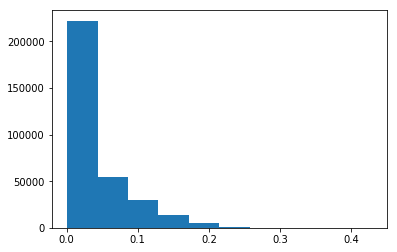

In [42]:
plt.hist(base_final['score'])
plt.show()

In [43]:
base_final.head()

,id_cliente,id_numero_cliente,score,decil
0,102652295880533801,13544804,0.076767,5
1,102652295151150201,6880226,0.029480,3
2,102652314595088801,41311613,0.014120,2
3,102652308842687701,36695801,0.014040,2
4,103552297266851902,23173372,0.009694,1


In [44]:
base_final.decil.value_counts()

1    109570
5     63778
2     60541
3     47960
4     44921
Name: decil, dtype: int64

In [45]:
# base_final.grupo_piloto.value_counts()

In [46]:
base_final.to_parquet("s3://adl-refined-dev-popular/parquet/TC_adquisicion/score_preaprobados_202111",engine='pyarrow', index=False)

In [47]:
path1 = "s3://adl-refined-dev-popular/parquet/TC_adquisicion/propension-tc_preaprob_M20211112.csv"
path2 = "s3://adl-refined-dev-popular/parquet/TC_adquisicion/tmp_propension-tc_preaprob_M20211112.csv"

base_final.to_csv(path1, index=False, sep='|')
base_final.to_csv(path2, index=False, sep='|')

In [48]:
# 	probs
# decil_probs	
# 0	0.000625
# 1	0.012490
# 2	0.024390
# 3	0.041525
# 4	0.074997

In [49]:
# probs
# decil_probs	
# 0	0.012484
# 1	0.024382
# 2	0.041522
# 3	0.074997
# 4	0.561887

In [50]:
# grupo_piloto

In [51]:
data_202008.score.max()

0.4286094009876251

In [52]:
data_202008.score.min()

0.0007034986047074199

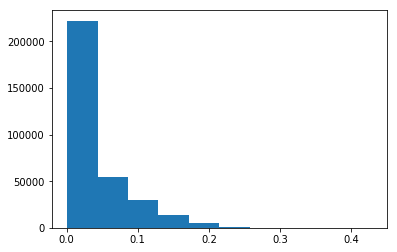

In [53]:
plt.hist(data_202008['score'])
plt.show()

In [54]:
# 	probs
# decil_probs	
# 0	0.001121
# 1	0.012206
# 2	0.023834
# 3	0.041186
# 4	0.072614

# 	probs
# decil_probs	
# 0	0.012195
# 1	0.023813
# 2	0.041180
# 3	0.072577
# 4	0.365485

In [55]:
base_final['decil_test'] = np.where(base_final['score'] <= 0.012206, 1,
                                np.where((base_final['score'] > 0.012206) & (base_final['score'] <= 0.023834), 2,
                                        np.where((base_final['score'] > 0.023834) & (base_final['score'] <= 0.041186), 3,
                                                np.where((base_final['score'] > 0.041186) & (base_final['score'] <= 0.072614), 4, 5))))

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
base_final.head()

,id_cliente,id_numero_cliente,score,decil,decil_test
0,102652295880533801,13544804,0.076767,5,5
1,102652295151150201,6880226,0.029480,3,3
2,102652314595088801,41311613,0.014120,2,2
3,102652308842687701,36695801,0.014040,2,2
4,103552297266851902,23173372,0.009694,1,1


In [57]:
base_final.shape

(326770, 5)

In [58]:
base_final.decil_test.value_counts()

1    109570
5     63778
2     60541
3     47960
4     44921
Name: decil_test, dtype: int64

In [59]:
aaaaaaaa

NameError: name 'aaaaaaaa' is not defined

In [ ]:
# data_202008_nuevo.columns

In [ ]:
data_202008_nuevo = pd.read_csv("s3://adl-refined-dev-popular/data_orig/tmp/tmpg_Ofertas_Riesgo082020_Preaprobados.csv",sep="|",encoding='latin-1')

In [ ]:
data_202008_nuevo.columns  = data_202008_nuevo.columns.str.lower()

In [ ]:
data_202008_nuevo.drop(columns = ['numero doc'], axis=1)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
vars2 = ['id_cliente', 'score', 'decil']
finalfinal = data_202008_nuevo.merge(base_final[vars2], on=['id_cliente'], how='left')

In [ ]:
finalfinal.shape

In [ ]:
finalfinal.head()

In [ ]:
finalfinal[finalfinal["score"].isnull() == False]

In [ ]:
finalfinal.head()

In [ ]:
finalfinal.to_parquet("s3://adl-refined-dev-popular/parquet/TC_adquisicion/score_preaprobados_202008_13500k",engine='pyarrow', index=False)

In [ ]:
path = "s3://adl-refined-dev-popular/parquet/TC_adquisicion/propension-tc_preaprob_M20210419.csv"
data = pd.read_csv(path, sep='|', dtype = {'id_cliente':str,'id_numero_cliente':str,
                                          'decil':np.int64})

print(data.shape)
data.head(15)

## Adaptación base final

In [60]:
data_202008.head()

,index,id_cliente,id_numero_cliente,amortizacion_min_LB,cuota_max_LB_SMLV,dias_desde_ult_tx_ahr,num_lib_solicitadas,num_no_aceptado,num_tx_ult_1mes_ahr,numero_obligaciones_activasdif,pasv_antig_total,pasv_saldo_ca_1mes_atras,porcentaje_utilizacion,prom_monto_novado,prom_n_cuotas,quanto_mod,sum_tx_linea_ahr,valor_cuotas_codeudores_smlv,valor_utilizado_smlv,score,decil_orig,decil
0,0,102652295880533801,13544804,0.34,0.78,NaN,1.0,NaN,NaN,0.00,164.70,0.25,0.00,16811819.0,99.0,2562000.0,NaN,0.59,0.00,0.076767,5,5
1,1,102652295151150201,6880226,0.19,1.80,NaN,1.0,NaN,NaN,-0.05,NaN,NaN,0.55,14438947.0,75.0,8630000.0,NaN,0.00,17.77,0.029480,3,3
2,2,102652314595088801,41311613,0.21,0.27,NaN,1.0,NaN,NaN,0.00,NaN,NaN,0.94,4916940.0,96.0,2607000.0,NaN,0.00,8.28,0.014120,2,2
3,3,102652308842687701,36695801,0.51,0.37,NaN,1.0,NaN,NaN,0.00,181.53,0.01,0.00,9593424.0,72.0,1844000.0,NaN,0.00,0.00,0.014040,2,2
4,4,103552297266851902,23173372,0.07,0.11,NaN,1.0,NaN,NaN,0.00,240.53,0.01,0.00,888697.0,49.0,1489000.0,NaN,0.00,0.00,0.009694,1,1


In [ ]:
# ## Cargando base del mes anterior

# path = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/propension-tc_preaprob_M20210914.csv'

# prueba_csv = pd.read_csv(path, sep='|')
# print(prueba_csv.shape)
# prueba_csv.head()


In [ ]:
# 5y4= Alta, 3=Medio 2= Medio bajo y 1 bajo

In [61]:
data_202008['nivel_prob'] = np.where(data_202008['decil']>=4, 'Alto',
                                np.where(data_202008['decil']>=3, 'Medio',
                                        np.where(data_202008['decil']>=2, 'Medio Bajo',
                                                np.where(data_202008['decil']>=1, 'Bajo', 'NA'))))

In [62]:
## Cargando base camp_activos
path = 's3://adl-refined-dev-popular/parquet/TC_adquisicion/data_camp_act_M202111'

data_camp = read_parquet(path)
data_camp = data_camp.rename(columns={'cedula':'id_numero_cliente'})


In [63]:
base_final = pd.merge(data_202008[['id_cliente','id_numero_cliente','score','decil', 'nivel_prob']], 
                      data_camp[['id_numero_cliente','num_meses_ult_camp']],
                      on=['id_numero_cliente'], how='left')

print(data_202008.shape)
print(data_camp.shape)
print(base_final.shape)
base_final.head()

(326770, 23)
(66322, 12)
(326770, 6)


,id_cliente,id_numero_cliente,score,decil,nivel_prob,num_meses_ult_camp
0,102652295880533801,13544804,0.076767,5,Alto,NaN
1,102652295151150201,6880226,0.029480,3,Medio,NaN
2,102652314595088801,41311613,0.014120,2,Medio Bajo,NaN
3,102652308842687701,36695801,0.014040,2,Medio Bajo,NaN
4,103552297266851902,23173372,0.009694,1,Bajo,NaN


In [69]:
base_final.count()

id_cliente            326770
id_numero_cliente     326770
score                 326770
decil                 326770
nivel_prob            326770
num_meses_ult_camp     50575
camp_anteriores       326770
grupo_camp            326770
dtype: int64

In [64]:
base_final['camp_anteriores'] = np.where(base_final['num_meses_ult_camp'] > 0, 'Tocado', 'No Tocado')

In [65]:
base_final.head()

,id_cliente,id_numero_cliente,score,decil,nivel_prob,num_meses_ult_camp,camp_anteriores
0,102652295880533801,13544804,0.076767,5,Alto,NaN,No Tocado
1,102652295151150201,6880226,0.029480,3,Medio,NaN,No Tocado
2,102652314595088801,41311613,0.014120,2,Medio Bajo,NaN,No Tocado
3,102652308842687701,36695801,0.014040,2,Medio Bajo,NaN,No Tocado
4,103552297266851902,23173372,0.009694,1,Bajo,NaN,No Tocado


In [70]:
base_final['camp_anteriores'].value_counts()

No Tocado    276195
Tocado        50575
Name: camp_anteriores, dtype: int64

In [66]:
base_final['grupo_camp'] = np.where((base_final['camp_anteriores'] == 'Tocado') & (base_final['nivel_prob'].isin(['Alto','Medio'])), 4,
                                np.where((base_final['camp_anteriores'] == 'No Tocado') & (base_final['nivel_prob'].isin(['Alto','Medio'])), 3,
                                        np.where((base_final['camp_anteriores'] == 'Tocado') & (base_final['nivel_prob'].isin(['Medio Bajo','Bajo'])), 2,
                                                np.where((base_final['camp_anteriores'] == 'No Tocado') & (base_final['nivel_prob'].isin(['Medio Bajo','Bajo'])), 1, 0))))

In [67]:
base_final[base_final['grupo_camp']==0].head()

,id_cliente,id_numero_cliente,score,decil,nivel_prob,num_meses_ult_camp,camp_anteriores,grupo_camp


In [71]:
base_final['grupo_camp'].value_counts()

3    141065
1    135130
2     34981
4     15594
Name: grupo_camp, dtype: int64

In [72]:
base_final = base_final.drop_duplicates()

In [73]:
path1 = "s3://adl-refined-dev-popular/parquet/TC_adquisicion/propension-tc_preaprob_M20211112.csv"
path2 = "s3://adl-refined-dev-popular/parquet/TC_adquisicion/tmp_propension-tc_preaprob_M20211112.csv"

base_final.to_csv(path1, index=False, sep='|')
base_final.to_csv(path2, index=False, sep='|')